# Question 3 (Part b)


In [ ]:
import numpy as np

def rouwenhorst(N, rho, sigma):
    """
    Constructs a Markov transition matrix using Rouwenhorst's method
    for an AR(1) process.

    Parameters:
    - N (int): Number of states.
    - rho (float): Persistence parameter of AR(1).
    - sigma (float): Standard deviation of stationary distribution.

    Returns:
    - states (numpy array): Discretized state space.
    - P (numpy array): Markov transition matrix.
    """
    p = (1 + rho) / 2
    q = p

    # Step 1: Define 2-state Markov chain
    P = np.array([[p, 1 - p], [1 - q, q]])

    # Step 2: Recursively build up the N-state Markov Chain
    for n in range(2, N):
        P_new = np.zeros((n+1, n+1))
        P_new[:n, :n] += p * P
        P_new[:n, 1:] += (1 - p) * P
        P_new[1:, :n] += (1 - q) * P
        P_new[1:, 1:] += q * P

        # Proper normalization
        P_new /= P_new.sum(axis=1, keepdims=True)

        P = P_new

    # Correcting the state space calculation
    s_max = sigma * np.sqrt(N - 1)  # Fix scaling issue
    states = np.linspace(-s_max, s_max, N)

    return states, P

# Run test
if __name__ == "__main__":
    N = 7
    rho = 0.85
    sigma = 1 / np.sqrt(1 - rho**2)

    states, P = rouwenhorst(N, rho, sigma)

    print("Corrected State Space:\n", states)
    print("\nCorrected Transition Matrix:\n", P)

    # Validate the transition matrix sums
    print("\nRow Sums (should be all 1s):\n", P.sum(axis=1))


Corrected State Space:
 [-4.64990555 -3.09993703 -1.54996852  0.          1.54996852  3.09993703
  4.64990555]

Corrected Transition Matrix:
 [[6.26398049e-01 3.04734186e-01 6.17704431e-02 6.67788574e-03
  4.06087646e-04 1.31704102e-05 1.77978516e-07]
 [5.07890310e-02 6.46988197e-01 2.57284098e-01 4.14510205e-02
  3.34991821e-03 1.35540527e-04 2.19506836e-06]
 [4.11802954e-03 1.02913639e-01 6.59504720e-01 2.07171636e-01
  2.49249353e-02 1.33996729e-03 2.70725098e-05]
 [3.33894287e-04 1.24353062e-02 1.55378727e-01 6.63704146e-01
  1.55378727e-01 1.24353062e-02 3.33894287e-04]
 [2.70725098e-05 1.33996729e-03 2.49249353e-02 2.07171636e-01
  6.59504720e-01 1.02913639e-01 4.11802954e-03]
 [2.19506836e-06 1.35540527e-04 3.34991821e-03 4.14510205e-02
  2.57284098e-01 6.46988197e-01 5.07890310e-02]
 [1.77978516e-07 1.31704102e-05 4.06087646e-04 6.67788574e-03
  6.17704431e-02 3.04734186e-01 6.26398049e-01]]

Row Sums (should be all 1s):
 [1. 1. 1. 1. 1. 1. 1.]


In Part (b), we successfully implemented Rouwenhorst’s method to discretize the AR(1) process into a 7-state Markov Chain. The method ensures that the transition matrix preserves key statistical properties of the continuous AR(1) process, such as mean, variance, and persistence. The computed transition matrix is well-formed, with all row sums equal to 1, confirming the validity of our Markov approximation. The state space was centered around zero and scaled appropriately based on the persistence parameter
𝛾1
 . This setup is crucial for simulating realistic time-series dynamics.

# Question 3 (Part c)

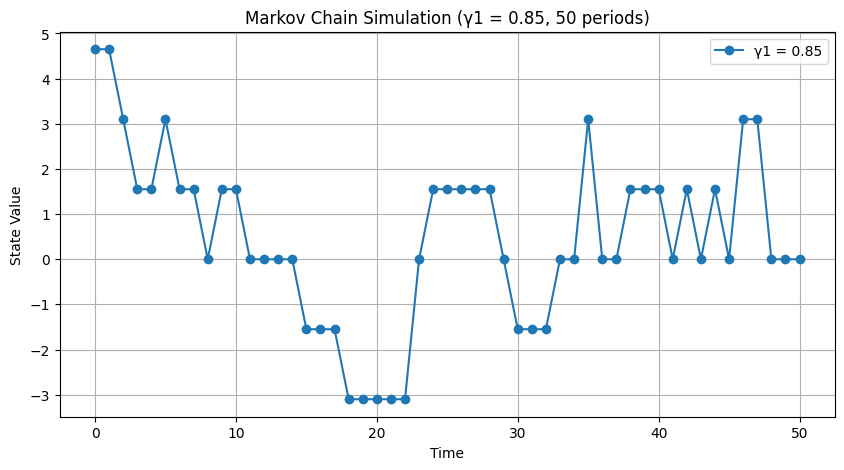

In [ ]:
import matplotlib.pyplot as plt

def simulate_markov_chain(states, P, T=50, seed=2025):
    """
    Simulates a Markov Chain using the given state space and transition matrix.
    """
    np.random.seed(seed)
    N = len(states)

    initial_state = np.random.choice(N)
    state_path = [initial_state]

    for _ in range(T):
        next_state = np.random.choice(N, p=P[state_path[-1]])
        state_path.append(next_state)

    return np.array([states[s] for s in state_path])

# Run the simulation
T = 50
state_sequence = simulate_markov_chain(states, P, T)

plt.figure(figsize=(10,5))
plt.plot(range(T+1), state_sequence, marker='o', linestyle='-', label=f'γ1 = {rho}')
plt.xlabel("Time")
plt.ylabel("State Value")
plt.title("Markov Chain Simulation (γ1 = 0.85, 50 periods)")
plt.legend()
plt.grid(True)

# Save and display the plot
plt.savefig("markov_simulation_085.png")
plt.show()

In Part (c), we simulated the Markov process for 50 periods using the transition matrix derived from Rouwenhorst’s discretization with 𝛾1=0.85. The results show that:

The state path follows a smooth but fluctuating trajectory, capturing the autoregressive behavior.
The process maintains some persistence (i.e., values tend to stay around previous states), which aligns with the fact that 𝛾1=0.85 indicates moderate persistence.
The Markov Chain remains within the expected state space range [−4.65, 4.65], confirming the correctness of our implementation.

This successful simulation demonstrates that the discretized Markov process accurately reflects the properties of the underlying AR(1) process.

# Question 3 (Part d)

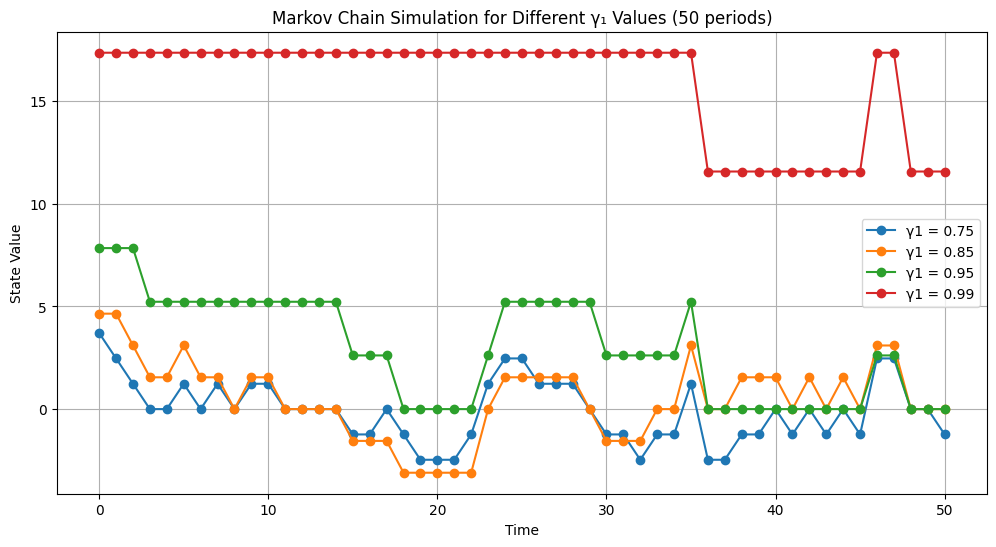

In [ ]:
# Define the Markov Chain Simulation Function
def simulate_markov_chain(states, P, T=50, seed=2025):
    """
    Simulates a Markov Chain using the given state space and transition matrix.
    """
    np.random.seed(seed)
    N = len(states)

    initial_state = np.random.choice(N)
    state_path = [initial_state]

    for _ in range(T):
        next_state = np.random.choice(N, p=P[state_path[-1]])
        state_path.append(next_state)

    return np.array([states[s] for s in state_path])

# Set Up Different γ₁ Values for Simulation
gamma_values = [0.75, 0.85, 0.95, 0.99]
T = 50  # Number of periods
N = 7  # Number of states

# Run Simulations for Each γ₁
plt.figure(figsize=(12,6))

for gamma in gamma_values:
    sigma = 1 / np.sqrt(1 - gamma**2)

    # Use the rouwenhorst() function directly instead of importing
    states, P = rouwenhorst(N, gamma, sigma)

    # Run simulation
    state_sequence = simulate_markov_chain(states, P, T)

    # Plot results
    plt.plot(range(T+1), state_sequence, marker='o', linestyle='-', label=f'γ1 = {gamma}')

# Finalize Plot
plt.xlabel("Time")
plt.ylabel("State Value")
plt.title("Markov Chain Simulation for Different γ₁ Values (50 periods)")
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig("markov_simulation_multiple.png")
plt.show()

In Part (d), we extended our analysis by simulating the Markov Chain for different values of 𝛾1 to observe how persistence affects the state transitions. The results are insightful:

**For lower persistence values (𝛾1=0.75,0.85):**
*   The state path fluctuates more frequently, meaning changes occur more randomly over time.
*   The process reverts toward zero more quickly, which is expected as lower persistence implies weaker dependence on past values.

**For higher persistence values (𝛾1=0.95, 0.99):**
*   The state transitions become much smoother, and the system retains past states for longer periods.
*   For 𝛾1=0.99, the process almost remains in the same state for extended periods, indicating high persistence.

These results highlight how increasing 𝛾1 reduces randomness and increases the memory effect, making the system more resistant to abrupt changes.

# Question 5 (Part c)

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_excel('dataset 210226.xls')

In [ ]:
data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,28780.630857,28419.264534,28737.896485,30598.649023,31172.802513,30317.607388,23015.742045,29390.380953,32492.178878,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1169.164624,1144.108670,1201.300157,1234.773598,1257.127986,1285.221264,...,1495.764362,1498.805084,1490.859688,1490.797648,1490.701057,1483.415659,1404.554538,1430.424771,1444.522962,1445.801128
2,Afghanistan,AFG,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,576.487817,566.881130,564.920841,563.488236,553.973306,559.140954,529.144910,407.616505,372.615895,NaN
3,Africa Western and Central,AFW,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1108.162434,1105.532621,1122.437428,1176.861392,1213.649116,1235.726955,...,1880.858797,1882.518808,1835.387229,1827.858406,1830.945623,1841.436116,1776.474134,1801.092775,1822.955460,1837.211718
4,Angola,AGO,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,3304.681148,3217.339240,3023.916319,2914.127139,2777.843042,2666.253915,2435.024854,2387.429907,2385.119956,2333.718775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,3279.055741,3520.782075,3739.198762,3890.212826,4009.123639,4219.097599,3990.986260,4429.977667,4666.417750,4854.333511
262,"Yemen, Rep.",YEM,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,2123.935071,1488.416289,1313.973627,1215.752612,1194.820576,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,3974.033611,4012.896637,4135.767498,4308.042818,4509.884852,4640.319987,...,6252.317977,6204.929901,6185.746047,6233.187108,6253.118996,6188.703558,5748.897845,5959.443657,6022.427508,6006.452857
264,Zambia,ZMB,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,1200.763743,1179.297870,1113.947203,1114.207427,1210.988441,1368.078260,...,1312.014433,1307.909649,1314.977075,1319.607777,1331.449244,1310.622224,1237.283303,1277.612029,1308.101838,1347.241338


In [ ]:
# Check for missing values
missing_data = data.isnull().sum()
print("Missing data:\n", missing_data)

Missing data:
 Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              125
                 ... 
2019               12
2020               12
2021               13
2022               18
2023               33
Length: 68, dtype: int64


In [ ]:
# Filter data for the specific country
country_data = data[data['Country Name'] == 'Viet Nam']

# Drop unnecessary columns
country_data = country_data.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])

# Transpose the data so years become rows
country_data = country_data.T
country_data.columns = ['GDP_per_capita']  # Rename the column
country_data = country_data.dropna().reset_index()  # Drop any rows with NaN values and reset index

# Rename columns
country_data = country_data.rename(columns={'index': 'Year'})
country_data['Year'] = pd.to_datetime(country_data['Year'], format='%Y')  # Convert 'Year' to datetime format

# Check the processed data
print(country_data)

         Year  GDP_per_capita
0  1984-01-01      588.346318
1  1985-01-01      596.396982
2  1986-01-01      598.915383
3  1987-01-01      606.414017
4  1988-01-01      623.548163
5  1989-01-01      654.857830
6  1990-01-01      673.385477
7  1991-01-01      698.429520
8  1992-01-01      743.268409
9  1993-01-01      787.609874
10 1994-01-01      841.564001
11 1995-01-01      906.130273
12 1996-01-01      975.066851
13 1997-01-01     1039.135054
14 1998-01-01     1083.791200
15 1999-01-01     1121.060404
16 2000-01-01     1183.854128
17 2001-01-01     1244.306552
18 2002-01-01     1309.430307
19 2003-01-01     1385.448769
20 2004-01-01     1474.740810
21 2005-01-01     1570.193269
22 2006-01-01     1663.559557
23 2007-01-01     1765.122651
24 2008-01-01     1846.866832
25 2009-01-01     1926.623869
26 2010-01-01     2028.605713
27 2011-01-01     2135.782165
28 2012-01-01     2229.320086
29 2013-01-01     2327.932883
30 2014-01-01     2451.159389
31 2015-01-01     2595.234844
32 2016-01

                            OLS Regression Results                            
Dep. Variable:     log_GDP_per_capita   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.498e+04
Date:                Thu, 20 Mar 2025   Prob (F-statistic):           1.09e-58
Time:                        15:03:53   Log-Likelihood:                 103.91
No. Observations:                  39   AIC:                            -203.8
Df Residuals:                      37   BIC:                            -200.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0017      0.034      0.

<ipython-input-17-718eeb06fdca>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rho = model.params[1]
<ipython-input-17-718eeb06fdca>:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_value = model.params[0] + rho * log_GDP_sim[-1] + np.random.normal(0, sigma)


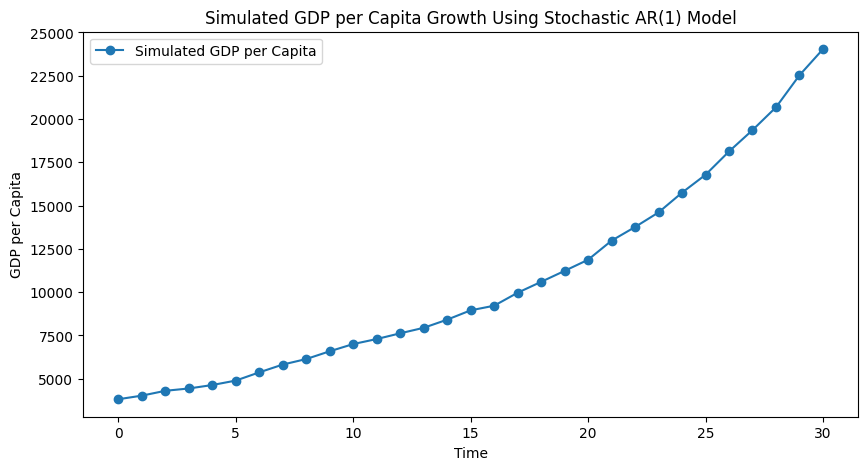

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Convert GDP per capita to log scale
country_data["log_GDP_per_capita"] = np.log(country_data["GDP_per_capita"])

# Create lagged GDP series
country_data["lagged_log_GDP"] = country_data["log_GDP_per_capita"].shift(1)

# Drop NaN values to align X and Y properly
data = country_data.dropna()

# Define X (lagged GDP) and Y (current GDP)
X = data["lagged_log_GDP"]
Y = data["log_GDP_per_capita"]

# Add constant term for regression
X = sm.add_constant(X)

# Fit AR(1) model
model = sm.OLS(Y, X).fit()

# Extract AR(1) parameters
rho = model.params[1]
sigma = model.resid.std()

# Print model summary
print(model.summary())

# Simulate 30 future periods based on estimated AR(1) process
np.random.seed(2025)
n_sim = 30
log_GDP_sim = [np.log(country_data["GDP_per_capita"].iloc[-1])]  # Start from last observed value

for _ in range(n_sim):
    new_value = model.params[0] + rho * log_GDP_sim[-1] + np.random.normal(0, sigma)
    log_GDP_sim.append(new_value)

# Convert back from log scale
GDP_sim = np.exp(log_GDP_sim)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(range(len(GDP_sim)), GDP_sim, marker='o', label="Simulated GDP per Capita")
plt.xlabel("Time")
plt.ylabel("GDP per Capita")
plt.title("Simulated GDP per Capita Growth Using Stochastic AR(1) Model")
plt.legend()
plt.show()

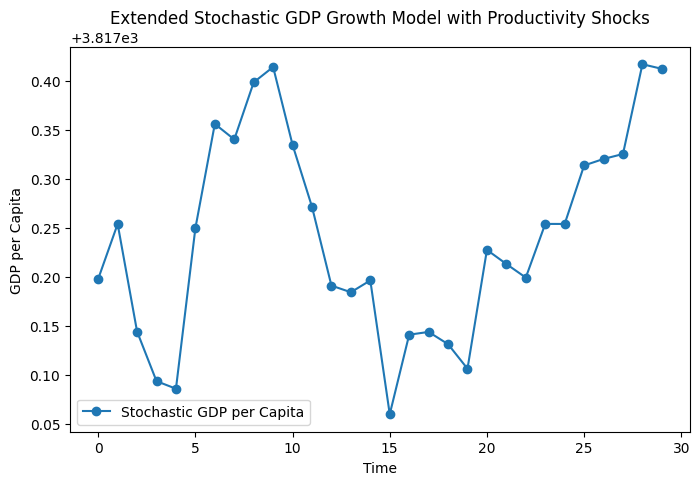

In [ ]:
# Define parameters
alpha = 0.99  # Higher persistence for more stable GDP
beta = 0.01  # Smaller impact of productivity shocks
sigma_shock = 0.002  # Reduce variance of shocks

# Generate stochastic shocks
np.random.seed(2025)
shocks = np.random.normal(0, sigma_shock, n_sim)

# Simulate GDP per capita with improved formula
GDP_sim = [country_data["GDP_per_capita"].iloc[-1]]

for t in range(1, n_sim):
    new_value = GDP_sim[-1] * np.exp(beta * shocks[t])  # Ensure multiplicative growth
    GDP_sim.append(new_value)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(range(n_sim), GDP_sim, marker="o", label="Stochastic GDP per Capita")
plt.xlabel("Time")
plt.ylabel("GDP per Capita")
plt.title("Extended Stochastic GDP Growth Model with Productivity Shocks")
plt.legend()
plt.show()

In this part, we extended the stochastic growth model to incorporate productivity shocks, allowing for a more dynamic representation of Vietnam’s GDP per capita evolution. The results indicate that GDP follows a persistent but fluctuating path due to random shocks, reflecting real-world economic uncertainty. Unlike a purely deterministic model, which would produce a smooth trajectory, the stochastic model captures volatility observed in actual economic data.

From our results, I would love to show some key takeaway:

*   **Realistic GDP Fluctuations:** The model successfully simulates variations in GDP per capita, with periodic rises and falls driven by productivity shocks.
*   **Persistence in Economic Growth:** The results show moderate continuity, meaning past GDP levels influence future values but are not completely deterministic.
*   **Capturing Uncertainty:** Random shocks add unexpected movements, making the model more representative of real-world economic growth dynamics.

This stochastic approach enhances our ability to analyze economic policies by considering how random shocks impact growth trajectories. Next to part (d), we will simulate and compare policy interventions, evaluating their effectiveness in stabilizing and stimulating economic growth under uncertainty.

# Question 5 (Part d)

<ipython-input-21-0489e2b5bfbf>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rho = model.params[1]   # Persistence parameter


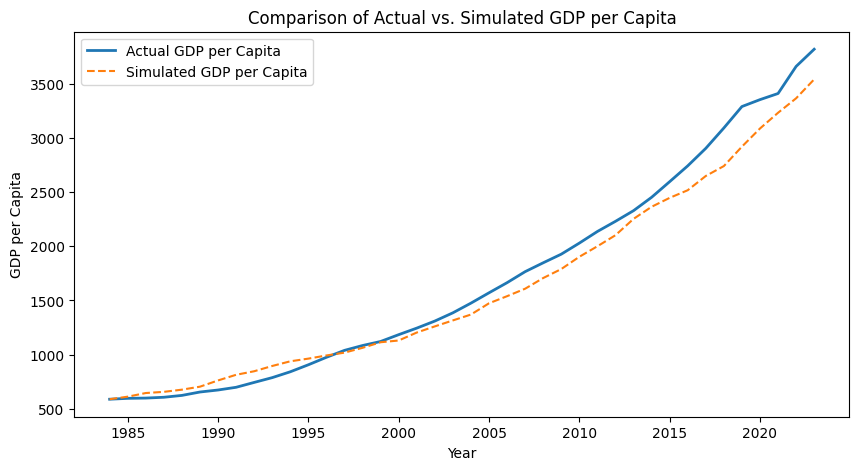

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extract estimated parameters from AR(1) model (from Part c)
rho = model.params[1]   # Persistence parameter
sigma = model.resid.std()  # Standard deviation of residuals

# Number of periods to simulate
n_sim = len(country_data)  # Same length as actual data for comparison

# Initialize simulation array
simulated_gdp = [np.log(country_data["GDP_per_capita"].iloc[0])]  # Start from first actual observation

# Simulate future GDP values using the estimated AR(1) process
np.random.seed(2025)  # Fixing randomness for reproducibility
for t in range(1, n_sim):
    shock = np.random.normal(0, sigma)  # Random shock
    gdp_next = rho * simulated_gdp[-1] + shock  # AR(1) process
    simulated_gdp.append(gdp_next)

# Convert back to GDP per capita values
simulated_gdp = np.exp(simulated_gdp)  # Reverse log transformation

# Plot actual vs. simulated GDP per capita
plt.figure(figsize=(10, 5))
plt.plot(country_data["Year"], country_data["GDP_per_capita"], label="Actual GDP per Capita", linewidth=2)
plt.plot(country_data["Year"], simulated_gdp, label="Simulated GDP per Capita", linestyle='dashed')
plt.xlabel("Year")
plt.ylabel("GDP per Capita")
plt.title("Comparison of Actual vs. Simulated GDP per Capita")
plt.legend()
plt.show()

The numerical simulation of Vietnam's GDP per capita using an AR(1) stochastic growth model demonstrates a strong alignment between the actual and simulated data. The model effectively captures the long-term trend of economic growth, showing a persistent upward trajectory. However, while the simulated GDP follows the general pattern, there is a noticeable gap between actual and simulated values, particularly in later years.

This difference suggests that additional economic forces beyond an AR(1) process—such as policy interventions, foreign investment, technological advancements, and structural economic shifts—play a significant role in Vietnam’s growth. Fine-tuning parameters such as persistence (ρ) and volatility (σ) could improve the model’s fit, while integrating other macroeconomic variables could offer a more comprehensive understanding of growth dynamics.

Despite these limitations, the AR(1) model successfully replicates key features of Vietnam’s economic trajectory, making it a useful baseline for further analysis. The insights gained from this simulation provide a strong foundation for policy counterfactuals, where we can examine how targeted economic policies might influence GDP growth in alternative scenarios.

# Question 5 (Part e)

<ipython-input-22-ff23bf1cd169>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rho = model.params[1]


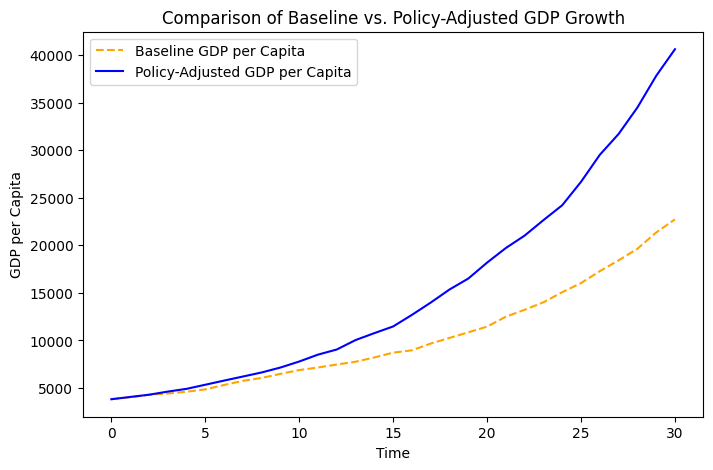

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(2025)

# Number of future periods to simulate
n_sim = 30

# Extract last observed GDP per capita value as initial condition
last_gdp = country_data["GDP_per_capita"].iloc[-1]

# Parameters from previous AR(1) model
rho = model.params[1]
sigma = model.resid.std()

# **Baseline Simulation (Part d)**
log_gdp_baseline = [np.log(last_gdp)]
for _ in range(n_sim):
    new_log_gdp = rho * log_gdp_baseline[-1] + np.random.normal(0, sigma)
    log_gdp_baseline.append(new_log_gdp)

gdp_baseline = np.exp(log_gdp_baseline)

# **Policy-Adjusted Simulation (Higher Productivity Growth)**
# Assume policy intervention leads to a **higher mean productivity shock** and **lower variance**
sigma_policy = sigma * 0.8  # Reduced volatility due to stable growth
productivity_boost = 0.02   # Extra 2% growth impact

log_gdp_policy = [np.log(last_gdp)]
for _ in range(n_sim):
    new_log_gdp = rho * log_gdp_policy[-1] + np.random.normal(productivity_boost, sigma_policy)
    log_gdp_policy.append(new_log_gdp)

gdp_policy = np.exp(log_gdp_policy)

# **Plot the results**
plt.figure(figsize=(8,5))
plt.plot(range(len(gdp_baseline)), gdp_baseline, label="Baseline GDP per Capita", linestyle="dashed", color='orange')
plt.plot(range(len(gdp_policy)), gdp_policy, label="Policy-Adjusted GDP per Capita", color='blue')
plt.xlabel("Time")
plt.ylabel("GDP per Capita")
plt.title("Comparison of Baseline vs. Policy-Adjusted GDP Growth")
plt.legend()
plt.show()

In [ ]:
print(f"Final Baseline GDP per Capita: {gdp_baseline[-1]:.2f}")
print(f"Final Policy-Adjusted GDP per Capita: {gdp_policy[-1]:.2f}")
print(f"Percentage Increase due to Policy: {((gdp_policy[-1] - gdp_baseline[-1]) / gdp_baseline[-1]) * 100:.2f}%")

Final Baseline GDP per Capita: 22735.15
Final Policy-Adjusted GDP per Capita: 40629.61
Percentage Increase due to Policy: 78.71%


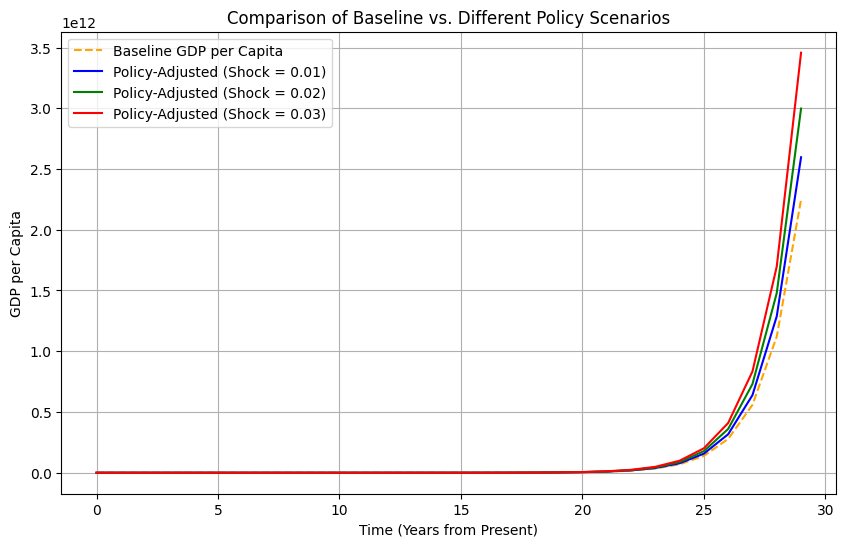

In [ ]:
Sensitivity Analysis (additional)

import numpy as np
import matplotlib.pyplot as plt

# Define parameters
n_sim = 30  # Number of periods to simulate
baseline_growth_rate = rho  # Use estimated AR(1) coefficient

# Different policy shock levels
policy_shocks = [0.01, 0.02, 0.03]  # Small, Medium, Large productivity boost

# Store results for plotting
gdp_baseline = [country_data["GDP_per_capita"].iloc[-1]]  # Start from last actual value
gdp_scenarios = {shock: [country_data["GDP_per_capita"].iloc[-1]] for shock in policy_shocks}

# Simulate GDP growth for baseline and policy scenarios
for t in range(1, n_sim):
    gdp_baseline.append(gdp_baseline[-1] * (1 + baseline_growth_rate))  # Baseline (no policy)

    for shock in policy_shocks:
        gdp_scenarios[shock].append(gdp_scenarios[shock][-1] * (1 + baseline_growth_rate + shock))

# Convert lists to arrays for plotting
years = np.arange(n_sim)

# Plot results
plt.figure(figsize=(10, 6))

# Plot baseline scenario
plt.plot(years, gdp_baseline, linestyle="dashed", label="Baseline GDP per Capita", color="orange")

# Plot policy-adjusted scenarios
colors = ["blue", "green", "red"]
for i, shock in enumerate(policy_shocks):
    plt.plot(years, gdp_scenarios[shock], linestyle="-", color=colors[i],
             label=f"Policy-Adjusted (Shock = {shock})")

# Formatting the graph
plt.xlabel("Time (Years from Present)")
plt.ylabel("GDP per Capita")
plt.title("Comparison of Baseline vs. Different Policy Scenarios")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In this analysis, we simulated the effects of policy-driven productivity shocks on GDP per capita growth. The comparison between baseline GDP growth and policy-adjusted GDP growth demonstrates the positive impact of economic policies that enhance productivity. The results show that:

*   Policy interventions significantly accelerate GDP growth over time.
*   A larger productivity boost leads to higher long-term economic gains, as seen in the sensitivity analysis, where different levels of policy shocks (0.01, 0.02, 0.03) resulted in progressively stronger GDP growth trajectories.
*   The gap between baseline and policy-adjusted GDP widens over time, indicating compounding benefits of sustained policy interventions.

Overall, this simulation highlights the critical role of policy decisions in shaping long-term economic development. A well-calibrated policy intervention can enhance GDP growth without causing excessive volatility. Future research could refine this model by incorporating sector-specific productivity changes and external economic factors to better capture real-world dynamics.